# **Welcome to my interactive essay!**

## I would like to share with you my linguistic analysis of *ted.com* web page where I always seek inspiration and which I treat as the fount of **all knowledge**!

But first, let me scrap the data from the page using a Python code :)

In [5]:

import requests
page = requests.get("https://ideas.ted.com/how-to-be-a-better-human-podcast-tips-advice/")
print(page)

<Response [200]>


As the page is already imported we need to import *BeautifulSoup* package which allows parsing HTML and XML documents! Isn't that great?!

It is used here to extract the data from the web.

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

Now let's find all of the text between paragraph tags and strip out the HTML!

In [7]:
paras = soup.find_all('p')
print(paras)

[<p><em>Ever wish you had go-to experts that you could tap for advice in all the varied areas of your life — your job, your home, your finances, even your emotions? TED has got you covered! </em></p>, <p><em>In our </em><a href="http://link.chtbl.com/ELygPTZC" rel="noopener" target="_blank">How to Be a Better Human</a><em><a href="http://link.chtbl.com/ELygPTZC" rel="noopener" target="_blank"> podcast</a>, host Chris Duffy speaks to an exciting mix of world-class researchers, thinkers and doers (read on to find out more!) and learns actionable takeaways that we can all use to improve our days and nights. Read on to learn the advice that he’s personally found the most helpful, and <a href="http://link.chtbl.com/ELygPTZC" rel="noopener" target="_blank">listen to episodes here</a>.</em></p>, <p><strong>As host of <a href="https://link.chtbl.com/ELygPTZC" rel="noopener" target="_blank">TED’s <em>How to Be a Better Human</em> podcast</a>, I’ve found that one of the most common reactions peo

We may now create a **for loop** to extract pure text from the page!

In [8]:
only_text = []
for el in paras:
  if len(el.getText().strip()) > 0:
    only_text.append(el.getText().strip())
print (only_text)

['Ever wish you had go-to experts that you could tap for advice in all the varied areas of your life — your job, your home, your finances, even your emotions? TED has got you covered!', 'In our How to Be a Better Human podcast, host Chris Duffy speaks to an exciting mix of world-class researchers, thinkers and doers (read on to find out more!) and learns actionable takeaways that we can all use to improve our days and nights. Read on to learn the advice that he’s personally found the most helpful, and listen to episodes here.', 'As host of TED’s How to Be a Better Human podcast, I’ve found that one of the most common reactions people have upon hearing about the show is to ask me: “What have you learned from it? And how can I become a better human?”', 'Well, actually, that’s sugarcoating it a bit. If I’m honest, what really happens when people learn about the show is they raise their eyebrows and look me over, seemingly thinking: “Who the heck are you, podcast boy, to think you can tell

After we prepare a pure text we may import a natural language tool kit to start the **linguistic analysis**!

In [11]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

The code below processes text by tokenizing it into words and then tagging each word with its part of speech which is possible thanks to the *nltk* package! The resulting tagged tuples are stored in the tuples list.

In [12]:
tuples = []
for sentence in only_text:
  tokens = nltk.word_tokenize(sentence)
  pos_tagged = nltk.pos_tag(tokens)
  for item in pos_tagged:
    tuples.append(item)

print (tuples)

[('Ever', 'RB'), ('wish', 'VB'), ('you', 'PRP'), ('had', 'VBD'), ('go-to', 'JJ'), ('experts', 'NNS'), ('that', 'IN'), ('you', 'PRP'), ('could', 'MD'), ('tap', 'VB'), ('for', 'IN'), ('advice', 'NN'), ('in', 'IN'), ('all', 'PDT'), ('the', 'DT'), ('varied', 'JJ'), ('areas', 'NNS'), ('of', 'IN'), ('your', 'PRP$'), ('life', 'NN'), ('—', 'VB'), ('your', 'PRP$'), ('job', 'NN'), (',', ','), ('your', 'PRP$'), ('home', 'NN'), (',', ','), ('your', 'PRP$'), ('finances', 'NNS'), (',', ','), ('even', 'RB'), ('your', 'PRP$'), ('emotions', 'NNS'), ('?', '.'), ('TED', 'NNP'), ('has', 'VBZ'), ('got', 'VBD'), ('you', 'PRP'), ('covered', 'VBD'), ('!', '.'), ('In', 'IN'), ('our', 'PRP$'), ('How', 'WRB'), ('to', 'TO'), ('Be', 'VB'), ('a', 'DT'), ('Better', 'NNP'), ('Human', 'NNP'), ('podcast', 'NN'), (',', ','), ('host', 'NN'), ('Chris', 'NNP'), ('Duffy', 'NNP'), ('speaks', 'VBZ'), ('to', 'TO'), ('an', 'DT'), ('exciting', 'JJ'), ('mix', 'NN'), ('of', 'IN'), ('world-class', 'NN'), ('researchers', 'NNS'), (',

As the tuples are organized we may now unpack them to create a dictionary consisting of keys and values.

The code counts the occurrences of different part-of-speech tags in the list.

>



In [18]:
counter_dict = {}
for el in tuples:
  tag = el[1]
  if tag not in counter_dict:
    counter_dict[tag] = 1
  else:
    counter_dict[tag] += 1

print(counter_dict)

{'RB': 138, 'VB': 122, 'PRP': 172, 'VBD': 49, 'JJ': 146, 'NNS': 90, 'IN': 214, 'MD': 26, 'NN': 264, 'PDT': 3, 'DT': 159, 'PRP$': 48, ',': 87, '.': 87, 'NNP': 101, 'VBZ': 58, 'WRB': 22, 'TO': 77, 'CC': 77, '(': 7, 'RP': 12, 'JJR': 13, ')': 7, 'VBN': 41, 'RBS': 3, 'VBP': 86, 'CD': 15, 'VBG': 70, ':': 9, 'WP': 12, "''": 3, 'FW': 1, 'WDT': 8, 'UH': 1, 'JJS': 2, 'WP$': 1, 'RBR': 8, 'EX': 1, 'NNPS': 3, 'POS': 1, '``': 2}


As I want to find the most common part of speech I have created a code to sort the result in descending order.

In [19]:
sorted_counter_dict = dict(sorted(counter_dict.items(), key=lambda item: item[1], reverse=True))

print(sorted_counter_dict)

{'NN': 264, 'IN': 214, 'PRP': 172, 'DT': 159, 'JJ': 146, 'RB': 138, 'VB': 122, 'NNP': 101, 'NNS': 90, ',': 87, '.': 87, 'VBP': 86, 'TO': 77, 'CC': 77, 'VBG': 70, 'VBZ': 58, 'VBD': 49, 'PRP$': 48, 'VBN': 41, 'MD': 26, 'WRB': 22, 'CD': 15, 'JJR': 13, 'RP': 12, 'WP': 12, ':': 9, 'WDT': 8, 'RBR': 8, '(': 7, ')': 7, 'PDT': 3, 'RBS': 3, "''": 3, 'NNPS': 3, 'JJS': 2, '``': 2, 'FW': 1, 'UH': 1, 'WP$': 1, 'EX': 1, 'POS': 1}


The code below iterates over the sorted_counter_dict dictionary, appending the keys to the keys list and their corresponding values to the values list.

It is a preparatory step for creating the bar chart which is possible because of the *matplotlib.pyplot* package.

['NN', 'IN', 'PRP', 'DT', 'JJ', 'RB', 'VB', 'NNP', 'NNS', ',', '.', 'VBP', 'TO', 'CC', 'VBG', 'VBZ', 'VBD', 'PRP$', 'VBN', 'MD', 'WRB', 'CD', 'JJR', 'RP', 'WP', ':', 'WDT', 'RBR', '(', ')', 'PDT', 'RBS', "''", 'NNPS', 'JJS', '``', 'FW', 'UH', 'WP$', 'EX', 'POS']
[264, 214, 172, 159, 146, 138, 122, 101, 90, 87, 87, 86, 77, 77, 70, 58, 49, 48, 41, 26, 22, 15, 13, 12, 12, 9, 8, 8, 7, 7, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]


<BarContainer object of 8 artists>

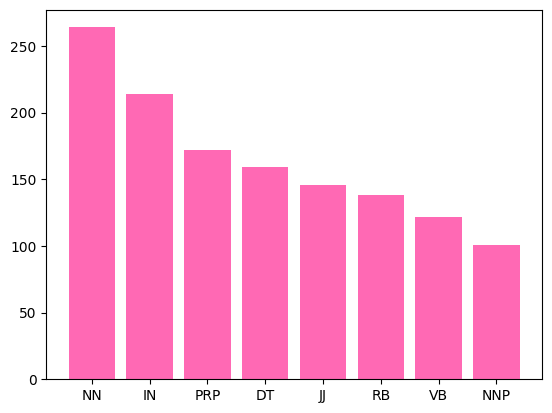

In [20]:
keys = []
values = []
for el in sorted_counter_dict:
    keys.append(el)
    values.append(sorted_counter_dict[el])

print (keys)
print(values)

import matplotlib.pyplot as plt

plt.bar(keys [0:8],values[0:8], color = 'hotpink')

Additionally I would like to create a pie chart to represent the percentage of the most common parts of speech.

To do this I need to find a sum of all the numbers in the list and then divide each one by that sum.

In [25]:
numbers = [264, 214, 172, 159, 146, 138, 122, 101]
total_sum = sum(numbers)
print(f"The sum of the numbers is:", total_sum)



The sum of the numbers is: 1316


In [27]:
for number in numbers:
    divided_number = number / 1316
    print(f"{number} divided by 1316 is: {divided_number}")

264 divided by 1316 is: 0.2006079027355623
214 divided by 1316 is: 0.16261398176291794
172 divided by 1316 is: 0.13069908814589665
159 divided by 1316 is: 0.12082066869300911
146 divided by 1316 is: 0.11094224924012158
138 divided by 1316 is: 0.10486322188449848
122 divided by 1316 is: 0.09270516717325228
101 divided by 1316 is: 0.07674772036474165


Now, I may imply the percentage into a code which creates a pie chart- for that we will need to import a *numpy* package.

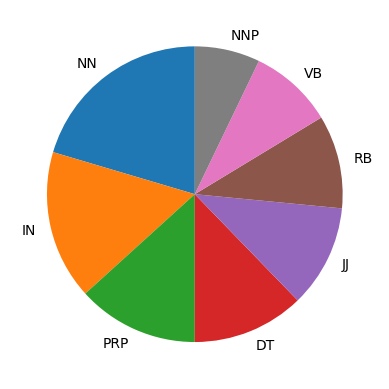

In [31]:
import numpy as np

chart = np.array([20, 16, 13, 12, 11, 10, 9, 7])
my_labels = ["NN", "IN", "PRP", "DT", "JJ", "RB", "VB", "NNP"]

plt.pie(chart, labels = my_labels, startangle = 90)
plt.show()

# **Conclusions** :)

*Ted.com* webpage mostly consists of nouns (NN, NNP), pronouns (PRP), determiners (DT), adjectives (JJ), adverbs (RB), prepositions (IN), and verbs (VB). It may suggest that the content is likely descriptive or informative in nature. It may contain detailed descriptions, narratives, or explanations, which are typical in content-rich articles and blogs.